# Compute performance metrics for the given Y and Y_score without sklearn

In [87]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [88]:
import os
os.chdir("C:\\Users\\amakh\\Downloads")

In [89]:
#Loading Dataset
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [90]:
df_a.shape

(10100, 2)

In [91]:
#Checking the composition of data

df_a.y.value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [92]:
#labeling y based on proba values
def y_predicted(proba):
    if proba < 0.5:
        return 0
    else:
        return 1
#using lambda function to add y_predicted column to dataframe
#https://thispointer.com/python-pandas-how-to-add-new-columns-in-a-dataframe-using-or-dataframe-assign/ 

df_a["y_predicted"] = df_a.apply(lambda row :y_predicted(row.proba),axis=1)

In [93]:
df_a.head()

,y,proba,y_predicted
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


**Confusion Matrix**

In [94]:
#Getting TN,FN,FP,TP values

TN = 0
FN = 0
FP = 0
TP = 0

TN = ((df_a['y']==0.0) & (df_a['y_predicted']==0.0)).sum()
FN = ((df_a['y']==1.0) & (df_a['y_predicted']==0.0)).sum()
FP = ((df_a['y']==0.0) & (df_a['y_predicted']==1.0)).sum()
TP = ((df_a['y']==1.0) & (df_a['y_predicted']==1.0)).sum()

In [95]:
print('TN:',TN)
print('FN:',FN)
print('FP:',FP)
print('TP:',TP)

TN: 0
FN: 0
FP: 100
TP: 10000


In [96]:
#The confusion matrix
print("Confusion Matrix:")
np.array([[TN , FP],[FN,TP]])


Confusion Matrix:


array([[    0,   100],
       [    0, 10000]], dtype=int64)

**F1 Score**

In [97]:
#calculating precision

Precesion = TP / (TP + FP)
print("Precesion :",Precesion)

#calculating recall

Recall = TP / (TP + FN)
print("Recall:",Recall)

#calculating F1 score
#Harmonic mean of Precision and Recall

F1 = (2 * Precesion * Recall) / (Precesion + Recall)
print("F1 Score:",F1)

Precesion : 0.9900990099009901
Recall: 1.0
F1 Score: 0.9950248756218906


**AUC Score**

In [98]:
#Sorting in ascending order

df_a = pd.read_csv('5_a.csv')
df_a.sort_values("proba", ascending=False, inplace=True)

proba = np.array(df_a['proba'])
y = np.array(df_a['y'])

FPR = []
TPR = []
thresholds = proba

#finding positive and negative points

P_points = df_a.loc[df_a.y == 1]
N_points = df_a.loc[df_a.y == 0]

P = P_points["y"].count()
N = N_points["y"].count()

for t in thresholds:
    FP=0
    TP=0
    for i in range(len(y)):
        if (proba[i] >= t):
            if y[i] == 1:
                TP +=1
            if y[i] == 0:
                FP +=1
    FPR.append(FP/N)
    TPR.append(TP/P)

#https://stackoverflow.com/a/39678975/4084039
#calculating the area under curve using trapezoidal method

FPR_array = np.array(FPR)
TPR_array = np.array(TPR)

AUC_score = np.trapz(TPR_array, FPR_array)
print('AUC Score :',AUC_score)

AUC Score : 0.48829900000000004


Text(0,0.5,'TPR')

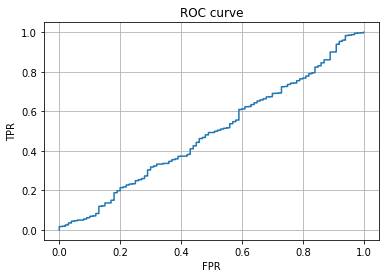

In [99]:
import matplotlib.pyplot as plt

plt.plot(FPR,TPR)
plt.grid()
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')

**Accuracy Score**

In [100]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)

print('Accuracy :',Accuracy)

Accuracy : 0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [101]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [102]:
df_b.shape

(10100, 2)

In [103]:
#Checking the composition of data

df_b.y.value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [104]:
#labeling y based on proba values
def y_predicted(proba):
    if proba < 0.5:
        return 0
    else:
        return 1
#using lambda function to add y_predicted column to dataframe
#https://thispointer.com/python-pandas-how-to-add-new-columns-in-a-dataframe-using-or-dataframe-assign/ 

df_b["y_predicted"] = df_b.apply(lambda row :y_predicted(row.proba),axis=1)

In [105]:
df_b.head()

,y,proba,y_predicted
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


**Confusion Matrix**

In [106]:
#Getting TN,FN,FP,TP values

TN = 0
FN = 0
FP = 0
TP = 0

TN = ((df_b['y']==0.0) & (df_b['y_predicted']==0.0)).sum()
FN = ((df_b['y']==1.0) & (df_b['y_predicted']==0.0)).sum()
FP = ((df_b['y']==0.0) & (df_b['y_predicted']==1.0)).sum()
TP = ((df_b['y']==1.0) & (df_b['y_predicted']==1.0)).sum()

In [107]:
print('TN:',TN)
print('FN:',FN)
print('FP:',FP)
print('TP:',TP)

TN: 9761
FN: 45
FP: 239
TP: 55


In [108]:
#The confusion matrix
print("Confusion Matrix:")
np.array([[TN , FP],[FN,TP]])


Confusion Matrix:


array([[9761,  239],
       [  45,   55]], dtype=int64)

**F1 Score**

In [109]:
#calculating precision

Precesion = TP / (TP + FP)
print("Precesion :",Precesion)

#calculating recall

Recall = TP / (TP + FN)
print("Recall:",Recall)

#calculating F1 score
#Harmonic mean of Precision and Recall

F1 = (2 * Precesion * Recall) / (Precesion + Recall)
print("F1 Score:",F1)

Precesion : 0.1870748299319728
Recall: 0.55
F1 Score: 0.2791878172588833


**Accuracy Score**

In [110]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)

print('Accuracy :',Accuracy)

Accuracy : 0.9718811881188119


**AUC Score**

In [111]:
#Sorting in ascending order

df_b = pd.read_csv('5_b.csv')
df_b.sort_values("proba", ascending=False, inplace=True)

proba = np.array(df_b['proba'])
y = np.array(df_b['y'])

FPR = []
TPR = []
thresholds = proba

#finding positive and negative points

P_points = df_b.loc[df_b.y == 1]
N_points = df_b.loc[df_b.y == 0]

P = P_points["y"].count()
N = N_points["y"].count()

for t in thresholds:
    FP=0
    TP=0
    for i in range(len(y)):
        if (proba[i] >= t):
            if y[i] == 1:
                TP +=1
            if y[i] == 0:
                FP +=1
    FPR.append(FP/N)
    TPR.append(TP/P)

#https://stackoverflow.com/a/39678975/4084039
#calculating the area under curve using trapezoidal method

FPR_array = np.array(FPR)
TPR_array = np.array(TPR)

AUC_score = np.trapz(TPR_array, FPR_array)
print('AUC Score :',AUC_score)

AUC Score : 0.9377570000000001


Text(0,0.5,'TPR')

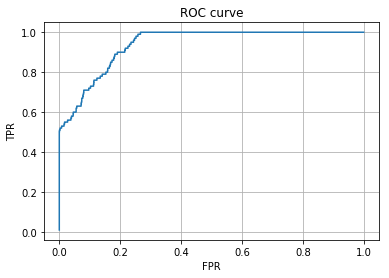

In [112]:
import matplotlib.pyplot as plt

plt.plot(FPR,TPR)
plt.grid()
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [113]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [114]:
#Taking tresholds as unique proba values
#Sorting them in ascending oirder

tresholds = sorted(np.unique(df_c.prob),reverse = True)


In [115]:
#labeling y_predicted bases on treshold values

A = []
FN = 0
FP = 0

for i in tresholds :
    y_predicted = []
    for j in df_c["prob"]:
        if j <= i:
            y_predicted.append(0)
        else:
            y_predicted.append(1)
            
    df_c['y_predicted'] = y_predicted
    
    #Getting FN,FP values
    FN = ((df_c['y']==1.0) & (df_c['y_predicted']==0.0)).sum()
    FP = ((df_c['y']==0.0) & (df_c['y_predicted']==1.0)).sum()
    
    # Getting value for metric A for each treshold value
    A.append((500 * FN) + (100 *FP))

In [116]:
#Finding the min value of A
min(A)

141000

In [117]:
#Finding the treshold value corresponding to the min A

print("Treshold value",tresholds[A.index(min(A))])

Treshold value 0.22987164436159915



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [118]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [119]:
y_pred = np.array(df_d['pred'])
y_actual = np.array(df_d['y'])

**Mean Square Error**

In [120]:
MSE = np.square(np.subtract(y_actual,y_pred )).mean()
print("MSE:",MSE)

MSE: 177.16569974554707


**Mean absolute percentage error**

In [121]:
MAPE = (np.mean(abs(y_actual-y_pred))/np.mean(y_actual))*100
print("MAPE:",MAPE)

MAPE: 12.91202994009687


**R^2 error**

In [122]:
#https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions

ss_residual = np.square(np.subtract(y_actual,y_pred )).sum()
ss_total = np.square(np.subtract(y_actual,np.mean(y_actual))).sum()

R2_error = 1 - (ss_residual/ss_total)

print("R^2 error:",R2_error)

R^2 error: 0.9563582786990937
